# Simple Model of Spiking Neurons
## http://www.izhikevich.org/publications/spikes.htm

In [1]:
import numpy

### Original Matlab code:
% Created by Eugene M. Izhikevich, February 25, 2003  
% Excitatory neurons    Inhibitory neurons  
Ne=800;                 Ni=200;  
re=rand(Ne,1);          ri=rand(Ni,1);  
a=[0.02*ones(Ne,1);     0.02+0.08*ri];  
b=[0.2*ones(Ne,1);      0.25-0.05*ri];  
c=[-65+15*re.^2;        -65*ones(Ni,1)];  
d=[8-6*re.^2;           2*ones(Ni,1)];  
S=[0.5*rand(Ne+Ni,Ne),  -rand(Ne+Ni,Ni)];  

v=-65*ones(Ne+Ni,1);    % Initial values of v  
u=b.*v;                 % Initial values of u  
firings=[];             % spike timings  

for t=1:1000            % simulation of 1000 ms  
  I=[5*randn(Ne,1);2*randn(Ni,1)]; % thalamic input  
  fired=find(v>=30);    % indices of spikes  
  firings=[firings; t+0*fired,fired];  
  v(fired)=c(fired);  
  u(fired)=u(fired)+d(fired);  
  I=I+sum(S(:,fired),2);  
  v=v+0.5*(0.04*v.^2+5*v+140-u+I); % step 0.5 ms  
  v=v+0.5*(0.04*v.^2+5*v+140-u+I); % for numerical  
  u=u+a.*(b.*v-u);                 % stability  
end;  
plot(firings(:,1),firings(:,2),'.');  

In [2]:
%%time
#
# My Python version
#
Ne=800
Ni=200

float_type = numpy.float

re=numpy.random.rand(Ne).astype(float_type)
ri=numpy.random.rand(Ni).astype(float_type)

a=numpy.concatenate((0.02*numpy.ones(Ne),0.02+0.08*ri)).astype(float_type)

b=numpy.concatenate((0.2*numpy.ones(Ne),0.25-0.05*ri)).astype(float_type)

c=numpy.concatenate((-65+15*re**2,-65*numpy.ones(Ni))).astype(float_type)

d=numpy.concatenate((8-6*re**2,2*numpy.ones(Ni))).astype(float_type)

# Excitatory and Inhibitory weights
S=numpy.hstack([0.5*numpy.random.rand(Ne+Ni,Ne),\
                -numpy.random.rand(Ne+Ni,Ni)]).astype(float_type)

# Initial membrane voltage
v=-65*numpy.ones(Ne+Ni, dtype=float_type)

# State variable (recovery)
u=(b*v)


Nsteps = 1000
step = 0.5
step_3 = step/3.0

firings_ids=numpy.empty((Nsteps,Ne+Ni),dtype=float_type)

voltages=numpy.empty((Nsteps,Ne+Ni),dtype=float_type)
voltages_cropped=numpy.empty((Nsteps,Ne+Ni),dtype=float_type)

I=numpy.concatenate((5*numpy.random.normal(loc=0,scale=1,size=Ne),\
                     2*numpy.random.normal(loc=0,scale=1,size=Ni))).astype(float_type) # thalamic input

CPU times: user 15.8 ms, sys: 9.48 ms, total: 25.3 ms
Wall time: 24.5 ms


In [3]:
%%time
for t in range(Nsteps):
    I=numpy.concatenate((5*numpy.random.normal(loc=0,scale=1,size=Ne),\
                         2*numpy.random.normal(loc=0,scale=1,size=Ni))).astype(float_type) # thalamic noisy input
    fired=(v>=30) # finds spiking neurons indices
    firings_ids[t,:]=fired
    voltages[t,:]=v # I'm saving before the cropping
    v[fired]=c[fired]
    voltages_cropped[t,:]=v # Here I'm saving after crop
    
    u[fired]=u[fired]+d[fired]
    I=I+S[:,fired].sum(axis=1)
    
    # Integration
    v+=step*(0.04*v**2+5*v+140-u+I)
    u+=step*a*(b*v-u)

CPU times: user 96.6 ms, sys: 7.32 ms, total: 104 ms
Wall time: 104 ms


In [4]:
ids=numpy.arange(1,Ne+Ni+1)
pfired = []
tfired = []
for t,fired in zip(range(Nsteps),firings_ids):
    res=ids[fired==1]
    for fi in res:
        pfired.append(fi)
        tfired.append(t)
pfired = numpy.array(pfired)
tfired = numpy.array(tfired)

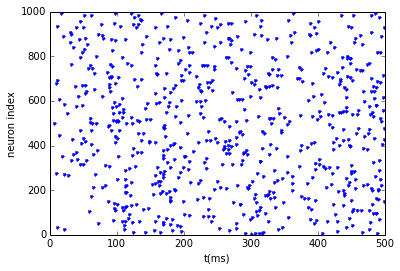

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(tfired*step,pfired,'.')
plt.xlabel("t(ms)")
plt.ylabel("neuron index")
plt.show()

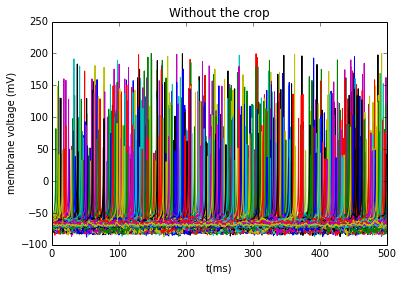

In [6]:
plt.plot(numpy.arange(Nsteps)*step,voltages[:,:])
plt.title("Without the crop")
plt.xlabel("t(ms)")
plt.ylabel("membrane voltage (mV)")
plt.show()

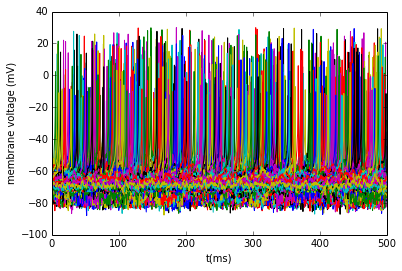

In [7]:
plt.plot(numpy.arange(Nsteps)*step,voltages_cropped[:,:])
plt.xlabel("t(ms)")
plt.ylabel("membrane voltage (mV)")
plt.show()